# Neural Network Implementation from Scratch: Titanic Survival Prediction

### Import required libraries:
    - pandas: For data manipulation and analysis
    - numpy: For numerical operations and array handling


In [154]:
import pandas as pd
import numpy as np

### Data Preprocessing

In [155]:
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
df.columns = df.columns.str.lower()
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
df = df.drop(columns=['name', 'passengerid', 'ticket', 'cabin'])
df.isna().count()

survived    891
pclass      891
sex         891
age         891
sibsp       891
parch       891
fare        891
embarked    891
dtype: int64

In [158]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df = df.drop(columns=['sibsp', 'parch'])

In [159]:
df['embarked']= df['embarked'].fillna(df['embarked'].mode())
df['age'] = df['age'].fillna(df['age'].mean())
df = pd.get_dummies(df, columns=['sex', 'embarked'])
df.head()

,survived,pclass,age,fare,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,7.2500,2,False,True,False,False,True
1,1,1,38.0,71.2833,2,True,False,True,False,False
2,1,3,26.0,7.9250,1,True,False,False,False,True
3,1,1,35.0,53.1000,2,True,False,False,False,True
4,0,3,35.0,8.0500,1,False,True,False,False,True


Here we calculating the correlation between different features and 'survived' column

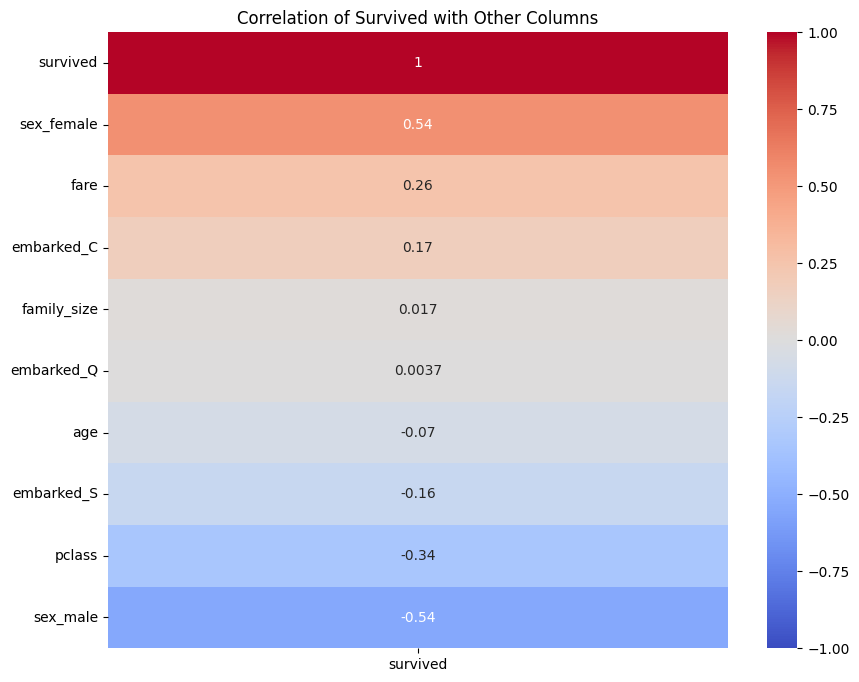

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['survived']].sort_values(by='survived', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Survived with Other Columns')
plt.show()

In [161]:
y = df['survived'].values.reshape(-1, 1)  
X = df.drop(columns=['survived'])

X

,pclass,age,fare,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22.000000,7.2500,2,False,True,False,False,True
1,1,38.000000,71.2833,2,True,False,True,False,False
2,3,26.000000,7.9250,1,True,False,False,False,True
3,1,35.000000,53.1000,2,True,False,False,False,True
4,3,35.000000,8.0500,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,1,False,True,False,False,True
887,1,19.000000,30.0000,1,True,False,False,False,True
888,3,29.699118,23.4500,4,True,False,False,False,True
889,1,26.000000,30.0000,1,False,True,True,False,False


In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['pclass', 'age', 'fare', 'family_size']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X = X.astype(float)
X

,pclass,age,fare,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0.827377,-0.592481,-0.502445,0.059160,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.786845,0.059160,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.284663,-0.488854,-0.560975,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.420730,0.059160,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.407926,-0.486337,-0.560975,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.386671,-0.560975,0.0,1.0,0.0,0.0,1.0
887,-1.566107,-0.823344,-0.044381,-0.560975,1.0,0.0,0.0,0.0,1.0
888,0.827377,0.000000,-0.176263,1.299429,1.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.284663,-0.044381,-0.560975,0.0,1.0,1.0,0.0,0.0


In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implementing Neural Network From Scratch

Initialize Neural Network Parameters

This function initializes the weights and biases for a 4-layer neural network using He initialization.
The architecture is:
- Input layer: input_size neurons
- Hidden layer 1: 64 neurons with ReLU activation
- Hidden layer 2: 32 neurons with ReLU activation  
- Hidden layer 3: 16 neurons with ReLU activation
- Output layer: 1 neuron with sigmoid activation

Parameters:
  input_size: Number of features in the input layer

Returns:
  params: Dictionary containing:
    - W1, W2, W3, W4: Weight matrices for each layer
    - b1, b2, b3, b4: Bias vectors for each layer
    - m_* and v_*: Momentum and velocity terms for Adam optimization


In [164]:
def init_params(input_size):
    params = {}
    params['W1'] = np.random.randn(input_size, 64) * np.sqrt(1 / input_size)
    params['W2'] = np.random.randn(64, 32) * np.sqrt(1 / 64)
    params['W3'] = np.random.randn(32, 16) * np.sqrt(1 / 32)
    params['W4'] = np.random.randn(16, 1) * np.sqrt(1 / 16)
    
    params['b1'] = np.zeros((1, 64))
    params['b2'] = np.zeros((1, 32))
    params['b3'] = np.zeros((1, 16))
    params['b4'] = np.zeros((1, 1))

    params['gamma1'] = np.ones((1, 64))
    params['gamma2'] = np.ones((1, 32))
    params['gamma3'] = np.ones((1, 16))
    
    params['beta1'] = np.zeros((1, 64))
    params['beta2'] = np.zeros((1, 32))
    params['beta3'] = np.zeros((1, 16))
    

    for key in ['W1', 'W2', 'W3', 'W4', 'b1', 'b2', 'b3', 'b4']:
        params[f'm_{key}'] = np.zeros_like(params[key])
        params[f'v_{key}'] = np.zeros_like(params[key])

    return params

Implement Batch Nomralization function 

In [165]:
def batch_norm(Z, gamma, beta, cache, training=True, epsilon=1e-8, momentum=0.9):
    
    if training:
        mu = np.mean(Z, axis=0)
        var = np.var(Z, axis=0)
        
        Z_norm = (Z - mu) / np.sqrt(var + epsilon)
        
        if 'running_mu' not in cache:
            cache['running_mu'] = mu
            cache['running_var'] = var
        else:
            cache['running_mu'] = momentum * cache['running_mu'] + (1 - momentum) * mu
            cache['running_var'] = momentum * cache['running_var'] + (1 - momentum) * var
            
        cache['Z'] = Z
        cache['Z_norm'] = Z_norm
        cache['mu'] = mu
        cache['var'] = var
        cache['epsilon'] = epsilon
        
        return gamma * Z_norm + beta
        
    else:
        if 'running_mu' not in cache:
            cache['running_mu'] = np.mean(Z, axis=0)
            cache['running_var'] = np.var(Z, axis=0)
            
        Z_norm = (Z - cache['running_mu']) / np.sqrt(cache['running_var'] + epsilon)
        return gamma * Z_norm + beta

Forward Propagation Implementation

This section implements the forward propagation for our 4-layer neural network.
The forward pass consists of:
1. Linear transformation + ReLU activation for layers 1-2
2. Linear transformation + Sigmoid activation for output layer
3. Optional dropout regularization after layers 1-2

The architecture processes data through:
- Input layer -> Hidden layer 1 (ReLU) -> Hidden layer 2 (ReLU) -> 
  Hidden layer 3 (ReLU) -> Output layer (Sigmoid)

In [166]:
def ReLU(Z):
    return np.maximum(1, Z)

def sigmoid(Z):
    Z = np.asarray(Z, dtype=np.float64)  # Ensure Z is a NumPy array with float64 dtype
    Z = np.clip(Z, -500, 500)  # Adjust these limits as needed
    return 1 / (1 + np.exp(-Z))

def forward_prop(X, params, training=True, keep_prob=1.0):
    cache = {}
    
    # Layer 1
    Z1 = np.dot(X, params['W1']) + params['b1']
    cache['bn1'] = {}
    Z1 = batch_norm(Z1, params['gamma1'], params['beta1'], cache['bn1'], training)
    A1 = ReLU(Z1)
    
    if keep_prob < 1.0:
        D1 = np.random.randn(*A1.shape) < keep_prob
        A1 *= D1 
        A1 /= keep_prob
        cache['D1'] = D1
    
    # Layer 2
    Z2 = np.dot(A1, params['W2']) + params['b2']
    cache['bn2'] = {}
    Z2 = batch_norm(Z2, params['gamma2'], params['beta2'], cache['bn2'], training)
    A2 = ReLU(Z2)
    
    if keep_prob < 1.0:
        D2 = np.random.rand(*A2.shape) < keep_prob
        A2 *= D2
        A2 /= keep_prob
        cache['D2'] = D2
    
    Z3 = np.dot(A2, params['W3']) + params['b3']
    cache['bn3'] = {}
    Z3 = batch_norm(Z3, params['gamma3'], params['beta3'], cache['bn3'], training)
    A3 = sigmoid(Z3)
    
    
    cache['Z1'], cache['A1'] = Z1, A1
    cache['Z2'], cache['A2'] = Z2, A2
    cache['Z3'], cache['A3'] = Z3, A3
    
    return A3, cache

Creating mini-batches for training involves:
1. Randomly shuffling the training data to avoid order bias
2. Splitting data into smaller batches of fixed size (e.g. 32 samples)
3. Handling any remaining samples that don't fit evenly into batches
4. Returning list of (X_batch, y_batch) tuples for training

In [167]:
def create_mini_batches(X, y, batch_size=32):
    batches = []
    m = X.shape[0]  

    permutation = np.random.permutation(m)  

    X, y = np.array(X), np.array(y)
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]  

    num_batches = m // batch_size

    for i in range(num_batches):
        X_mini = X_shuffled[i * batch_size:(i + 1) * batch_size]
        y_mini = y_shuffled[i * batch_size:(i + 1) * batch_size]
        batches.append((X_mini, y_mini))

    if m % batch_size != 0:
        X_mini = X_shuffled[num_batches * batch_size:]
        y_mini = y_shuffled[num_batches * batch_size:]
        batches.append((X_mini, y_mini))

    return batches


Computing Loss

Step 1: Cross-Entropy Loss
m = number of samples
Formula: CE = 1/m * Σ(-y*log(ŷ + ε) + (1-y)*log(1-ŷ + ε))
Where:
- ŷ is predicted value (y_pred)
- y is true label
- ε is small constant (1e-10) to prevent log(0)

Step 2: L2 Regularization Loss
Formula: L2 = λ * (ΣW1² + ΣW2² + ΣW3²)
Where:
- λ is regularization strength (lambda_reg)
- W1, W2, W3 are weight matrices

Step 3: Total Loss
Formula: Total Loss = Cross-Entropy Loss + L2 Loss



In [168]:
def compute_loss(y_pred, y, params, lambda_reg=0):
    m = y.shape[0]
    cross_entropy_loss = 1/m * np.sum(-y*np.log(y_pred+1e-10)+(1-y)*np.log(1-y_pred+1e-10))
    l2_loss = lambda_reg * (np.sum(params['W1']**2) + np.sum(params['W2']**2) + np.sum(params['W3']**2))
    return cross_entropy_loss + l2_loss

Implement batch norm for back prop

In [169]:
def batch_norm_backward(dout, cache, gamma):
    Z = cache['Z']        # Original input
    Z_norm = cache['Z_norm']  # Normalized values
    mu = cache['mu']      # Mean
    var = cache['var']    # Variance
    epsilon = cache['epsilon']  # Small number for numerical stability
    
    # Batch size
    N = Z.shape[0]
    
    # Standard deviation inverse (1/σ)
    std_inv = 1. / np.sqrt(var + epsilon)
    # Centered input (x - μ)
    Z_mu = Z - mu
    
    # 1. Gradient for gamma (scale parameter)
    # dL/dγ = Σ(dout * normalized_input)
    dgamma = np.sum(dout * Z_norm, axis=0, keepdims=True)
    
    # 2. Gradient for beta (shift parameter)
    # dL/dβ = Σ(dout)
    dbeta = np.sum(dout, axis=0, keepdims=True)
    
    # 3. Gradient with respect to input Z
    # This is the complicated part! It comes from differentiating
    # the batch norm equation: y = γ * (x - μ)/√(σ² + ε) + β
    dZ = gamma * dout * std_inv / N * (
        N -                                                    # Term 1
        Z_mu * std_inv**2 * np.sum(dout * Z_mu, axis=0, keepdims=True) -  # Term 2
        np.sum(dout, axis=0, keepdims=True)                   # Term 3
    )
    
    return dZ, dgamma, dbeta

Backpropagation

Purpose: Calculate gradients for updating network parameters during training

Input Parameters:
- X: Input features
- y: True labels 
- params: Dictionary containing weights (W1,W2,W3) and biases (b1,b2,b3)
- cache: Dictionary containing activations (A1,A2,A3) and pre-activations (Z1,Z2,Z3)
- keep_prob: Dropout probability (1.0 means no dropout)

Process:
1. Calculate output layer gradients (dZ3,dW3,db3)
2. Calculate hidden layer 2 gradients (dA2,dZ2,dW2,db2) with ReLU derivative
3. Apply dropout if keep_prob < 1.0
4. Calculate hidden layer 1 gradients (dA1,dZ1,dW1,db1) with ReLU derivative
5. Apply dropout if keep_prob < 1.0

Returns:
- grads: Dictionary containing gradients for all weights and biases


In [170]:
def back_prop(X, y, params, cache, keep_prob=1.0):
    m = X.shape[0]
    grads = {}
    
    dZ3 = cache['A3'] - y
    grads['dW3'] = (1/m) * np.dot(cache['A2'].T, dZ3)
    grads['db3'] = (1/m) * np.sum(dZ3, axis=0, keepdims=True)
    
    dA2 = np.dot(dZ3, params['W3'].T)
    if keep_prob < 1.0 and 'D2' in cache:
        dA2 *= cache['D2']
        dA2 /= keep_prob
    dZ2 = dA2 * (cache['Z2'] > 0)
    dZ2, grads['dgamma2'], grads['dbeta2'] = batch_norm_backward(dZ2, cache['bn2'], params['gamma2'])
    grads['dW2'] = (1/m) * np.dot(cache['A1'].T, dZ2)
    grads['db2'] = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = np.dot(dZ2, params['W2'].T)
    if keep_prob < 1.0 and 'D1' in cache:
        dA1 *= cache['D1']
        dA1 /= keep_prob
    dZ1 = dA1 * (cache['Z1'] > 0)
    dZ1, grads['dgamma1'], grads['dbeta1'] = batch_norm_backward(dZ1, cache['bn1'], params['gamma1'])
    grads['dW1'] = (1/m) * np.dot(X.T, dZ1)
    grads['db1'] = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    return grads

Actually update params after back prop grads calculations

In [171]:
def update_params(params, grads, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    updated_params = params.copy()
    
    # Update for weights and biases
    for key in ['W1', 'W2', 'W3', 'b1', 'b2', 'b3']:
        if f'd{key}' in grads:
            updated_params[f'm_{key}'] = beta1 * params[f'm_{key}'] + (1 - beta1) * grads[f'd{key}']
            updated_params[f'v_{key}'] = beta2 * params[f'v_{key}'] + (1 - beta2) * (grads[f'd{key}'] ** 2)
            
            # Bias correction
            m_hat = updated_params[f'm_{key}'] / (1 - beta1 ** t)
            v_hat = updated_params[f'v_{key}'] / (1 - beta2 ** t)
            
            updated_params[key] = params[key] - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    
    for key in ['gamma1', 'gamma2', 'gamma3', 'beta1', 'beta2', 'beta3']:
        if f'd{key}' in grads:
            updated_params[key] = params[key] - learning_rate * grads[f'd{key}']
    
    return updated_params

Define the main training model that will use the forward prop, back prop and parameter updates

In [172]:
def model(X, y, params, epochs, decay_rate=0.2, learning_rate=0.01, batch_size=32, keep_prob=0.8, lambda_reg=0, beta1=0.09, beta2=0.999):
    learning_rate0 = learning_rate
    t = 1  # Initialize time step for Adam

    for i in range(epochs):
        batches = create_mini_batches(X, y, batch_size=batch_size)
        epoch_loss = 0  

        for X_mini, y_mini in batches:
            A3, cache = forward_prop(X_mini, params, keep_prob)
            loss = compute_loss(A3, y_mini, params, lambda_reg=lambda_reg)
            epoch_loss += loss  
            grads = back_prop(X_mini, y_mini, params, cache, keep_prob)
            params = update_params(params, grads, learning_rate, beta1, beta2, epsilon=1e-8, t=t)
            t += 1  # Increment time step
        
        learning_rate = (1 / (1 + decay_rate * i)) * learning_rate0
        epoch_loss /= len(batches)

        if (i + 1) % 100 == 0:
            print(f"Epoch {i + 1} Done")
            print("Learning rate: ", learning_rate)

    return params


In [173]:
def predict(X, params):
    predictions, _ = forward_prop(X, params, training=False)
    return predictions > 0.5

Hyperparameter Tuning

In the next cell, we perform hyperparameter tuning using random search:

1. First, we split our training data into training and validation sets (80-20 split)

2. We define a parameter grid with different values to try for:
   - learning_rate: Controls step size during optimization (0.001, 0.01, 0.1)
   - keep_prob: Dropout probability (0.7, 0.8, 0.9) 
   - beta1: First momentum parameter for Adam optimizer (0.9, 0.95)
   - beta2: Second momentum parameter for Adam optimizer (0.999, 0.995)
   - decay_rate: Learning rate decay (0.0, 0.001, 0.01)
   - batch_size: Mini-batch sizes (32, 64, 128)

3. Using sklearn's ParameterSampler, we randomly sample 10 different combinations
   of these parameters to try

4. For each parameter combination:
   - Train the model for 2000 epochs
   - Evaluate accuracy on validation set
   - Keep track of best performing parameters

This helps us find optimal hyperparameters without having to try every possible combination

In [ ]:
from sklearn.model_selection import ParameterSampler, train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


param_grid = {
    'learning_rate': [0.2, 0.3, 0.01, 0.1, 0.05],
    'keep_prob': [0.7, 0.8, 0.9],
    'beta1': [0.9, 0.95],
    'beta2': [0.999, 0.995],
    'decay_rate': [0.0, 0.001, 0.01],
    'batch_size': [32, 64],
    'lambda_reg': [0, 0.001, 0.01]
}


# Generates 20 random samples of the hyper params
param_samples = list(ParameterSampler(param_grid, n_iter=20))

best_accuracy = 0
best_params = {}

params = init_params(X.shape[1])

for params_sample in param_samples:
    print("Testing params: ", params_sample)

    model_params = model(
        X_train, y_train,
        params=params,
        epochs=1000,
        learning_rate=params_sample['learning_rate'],
        keep_prob=params_sample['keep_prob'],
        beta1=params_sample['beta1'],
        beta2=params_sample['beta2'],
        decay_rate=params_sample['decay_rate'],
        lambda_reg=params_sample['lambda_reg'],
        batch_size=params_sample['batch_size']
    )

    y_pred = predict(X_val, model_params)
    accuracy = np.mean(y_pred == y_val) * 100
    print(f"Validation Accuracy: {accuracy:.2f}%")
    
    # Track best params
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params_sample

Testing params:  {'learning_rate': 0.1, 'lambda_reg': 0.01, 'keep_prob': 0.9, 'decay_rate': 0.0, 'beta2': 0.999, 'beta1': 0.95, 'batch_size': 32}
Epoch 100 Done
Learning rate:  0.1
Epoch 200 Done
Learning rate:  0.1
Epoch 300 Done
Learning rate:  0.1
Epoch 400 Done
Learning rate:  0.1
Epoch 500 Done
Learning rate:  0.1
Epoch 600 Done
Learning rate:  0.1
Epoch 700 Done
Learning rate:  0.1
Epoch 800 Done
Learning rate:  0.1
Epoch 900 Done
Learning rate:  0.1
Epoch 1000 Done
Learning rate:  0.1
Validation Accuracy: 77.62%
Testing params:  {'learning_rate': 0.05, 'lambda_reg': 0.001, 'keep_prob': 0.9, 'decay_rate': 0.001, 'beta2': 0.999, 'beta1': 0.9, 'batch_size': 64}
Epoch 100 Done
Learning rate:  0.04549590536851684
Epoch 200 Done
Learning rate:  0.041701417848206836
Epoch 300 Done
Learning rate:  0.03849114703618168
Epoch 400 Done
Learning rate:  0.035739814152966405
Epoch 500 Done
Learning rate:  0.0333555703802535
Epoch 600 Done
Learning rate:  0.03126954346466542
Epoch 700 Done
Lear

Now after we got the **best_params** let's train the model with 5000 epochs

In [175]:
print("Best val accuracy: ", best_accuracy)
best_params

Best val accuracy:  78.32167832167832


{'learning_rate': 0.1,
 'lambda_reg': 0,
 'keep_prob': 0.7,
 'decay_rate': 0.001,
 'beta2': 0.999,
 'beta1': 0.9,
 'batch_size': 32}

In [176]:
params = init_params(X.shape[1])
params = model(X_train, y_train, params, 5000, **best_params)

Epoch 100 Done
Learning rate:  0.09099181073703368
Epoch 200 Done
Learning rate:  0.08340283569641367
Epoch 300 Done
Learning rate:  0.07698229407236336
Epoch 400 Done
Learning rate:  0.07147962830593281
Epoch 500 Done
Learning rate:  0.066711140760507
Epoch 600 Done
Learning rate:  0.06253908692933084
Epoch 700 Done
Learning rate:  0.05885815185403179
Epoch 800 Done
Learning rate:  0.05558643690939411
Epoch 900 Done
Learning rate:  0.0526592943654555
Epoch 1000 Done
Learning rate:  0.05002501250625312
Epoch 1100 Done
Learning rate:  0.04764173415912339
Epoch 1200 Done
Learning rate:  0.04547521600727604
Epoch 1300 Done
Learning rate:  0.04349717268377556
Epoch 1400 Done
Learning rate:  0.041684035014589414
Epoch 1500 Done
Learning rate:  0.040016006402561026
Epoch 1600 Done
Learning rate:  0.038476337052712584
Epoch 1700 Done
Learning rate:  0.037050759540570584
Epoch 1800 Done
Learning rate:  0.03572704537334763
Epoch 1900 Done
Learning rate:  0.03449465332873405
Epoch 2000 Done
Lear

Now let's evaluate the model's performance on both training and test sets

In [178]:
y_pred = predict(X_test, params)

accuracy = np.mean(y_pred ==y_test) *100
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 81.01%
